# Example 4: PyPSA v.s PSS/E
This notebook demonstrates how to compare the PyPSA and PSS/E results.

pre compiled PSS/E data can be found in the database with the specifics found here.

if you can and have the license, feel free to run the PSSE simulation yourself 


This example uses the RTS GMLC case system with wave energy converter farm. (74 buses)

In [ ]:
import wecgrid

example4 = wecgrid.Engine("../data/WECGrid.db")
example4.case("../data/grid_models/IEEE_14_bus.RAW")
example4.load(["pypsa"])
example4
#example4.load(["pypsa", "psse"]) # Uncomment to load PSSE data



     __     __     ______     ______     ______     ______     __     _____
    /\ \  _ \ \   /\  ___\   /\  ___\   /\  ___\   /\  == \   /\ \   /\  __-.
    \ \ \/ ".\ \  \ \  __\   \ \ \____  \ \ \__ \  \ \  __<   \ \ \  \ \ \/\ \
     \ \__/".~\_\  \ \_____\  \ \_____\  \ \_____\  \ \_\ \_\  \ \_\  \ \____-
      \/_/   \/_/   \/_____/   \/_____/   \/_____/   \/_/ /_/   \/_/   \/____/
                


C:\Users\PDC-user\alexb\WEC-Grid\src\wecgrid\modelers\power_system\base.py:331: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tdf[col] = pd.NA


SLD Data Summary:
  Buses: 73
  Lines: 105
  Generators: 98
  Loads: 51


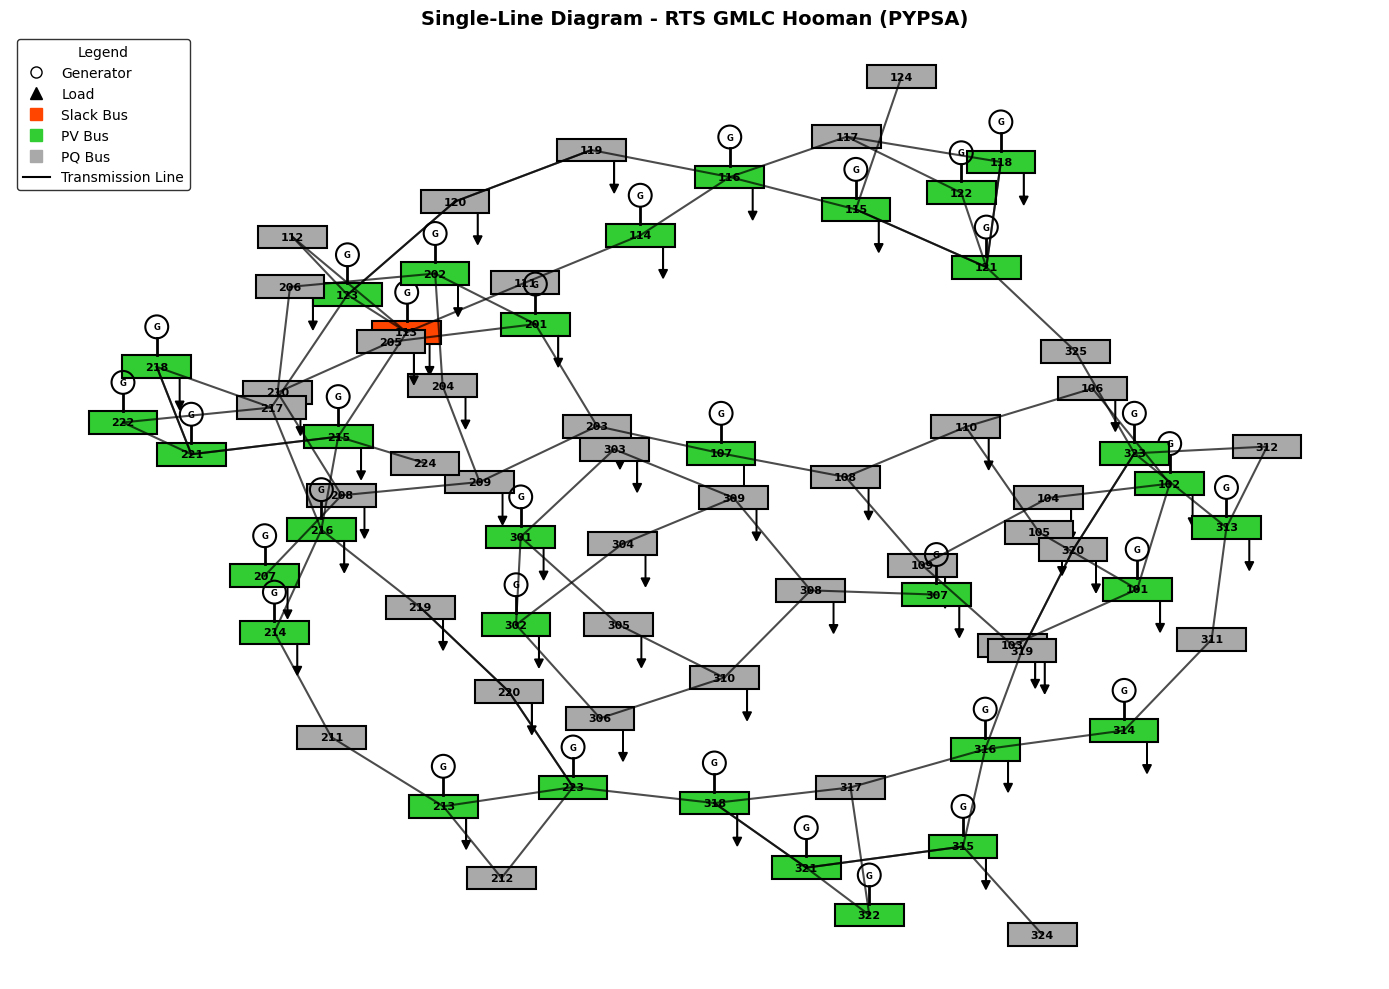

In [2]:
example4.plot.sld()

## Apply the WEC-Farms

Lets create 3 WEC Farm. These Farms will have 10 RM3 devices each.

In [3]:
###### RM3 Farm Connected to bus 123 
example4.apply_wec(
   farm_name = "RM3-FARM",
   size = 10, 
   wec_sim_id = 1,
   bus_location=326, # create a new bus for farm  
   connecting_bus = 123, 
)

WEC Farm added: RM3-FARM


## Run Time Series Simulation with load curve

In [4]:
example4.simulate()

PyPSA Simulating: 100%|██████████| 288/288 [04:44<00:00,  1.01step/s]

Simulation complete: 284.02s


## Pre-compiled PSSE simulation

we can pull the pre-compiled PSSE simulation to be able to compare with PyPSA

In [5]:
example4.database.grid_sims()

,grid_sim_id,sim_name,case_name,psse,pypsa,sbase_mva,sim_start_time,sim_end_time,delta_time,notes,created_at
0,1,PSSE-RTS-GMLC: RM3 Farm,RTS GMLC Hooman,1,0,100.0,2025-08-24T00:00:00,2025-08-24T23:55:00,300,RTS-GMLC grid simulation using PSS/E. The simu...,2025-08-24 20:19:19
1,2,PSSE-RTS-GMLC,RTS GMLC Hooman,1,0,100.0,2025-08-24T00:00:00,2025-08-24T23:55:00,300,RTS-GMLC grid simulation using PSS/E. The simu...,2025-08-24 19:10:55


In [6]:
psse_grid = example4.database.pull_sim(grid_sim_id=1, software='psse')

GridState reconstructed: RTS GMLC Hooman (PSSE) - 74 buses, 99 generators


## Review Grid data

In [7]:
psse_grid.bus_t

{'type':                     Bus_101 Bus_102 Bus_103 Bus_104 Bus_105 Bus_106 Bus_107  \
 2025-08-24 00:00:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 00:05:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 00:10:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 00:15:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 00:20:00      PV      PV      PV      PV      PQ      PQ      PV   
 ...                     ...     ...     ...     ...     ...     ...     ...   
 2025-08-24 23:35:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 23:40:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 23:45:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 23:50:00      PV      PV      PV      PV      PQ      PQ      PV   
 2025-08-24 23:55:00      PV      PV      PV      PV      PQ      PQ      PV   
 
                     Bus_108 B

In [8]:
example4.pypsa.grid

GridState:
├─ Components:
│   ├─ bus:   74 components
│   ├─ gen:   99 components
│   ├─ line:  106 components
│   └─ load:  51 components
├─ Case: RTS GMLC Hooman
└─ Modeler: pypsa

## Analyze, visualize and compare results

In [9]:
# add our 'external' grid to WEC-Grid 
example4.plot.add_grid(software='psse', grid_state=psse_grid)

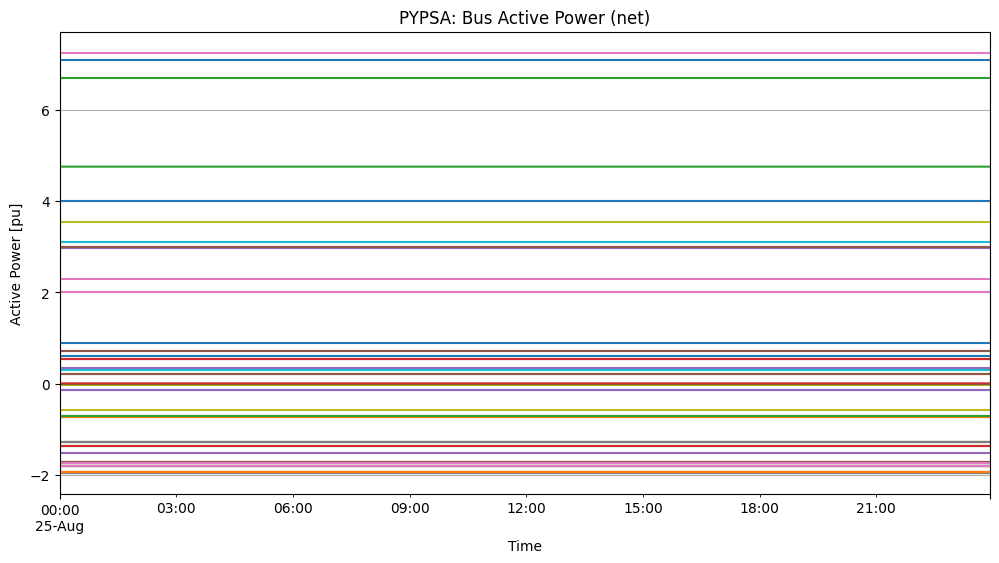

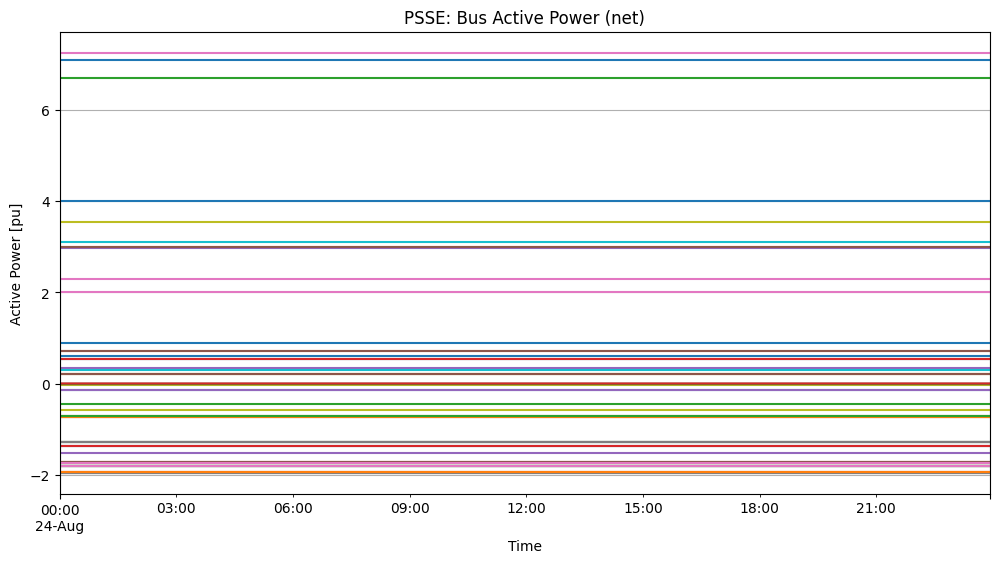

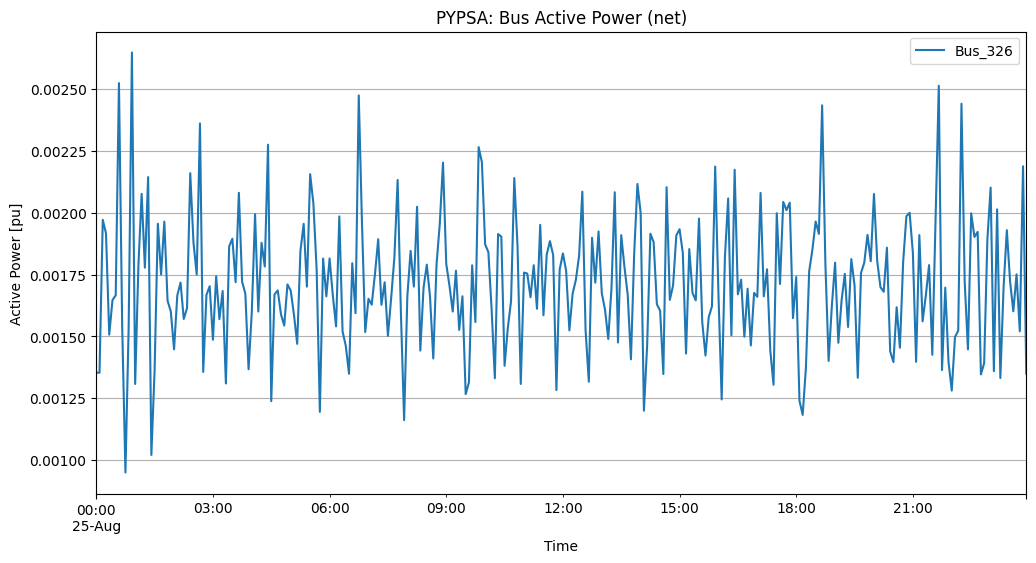

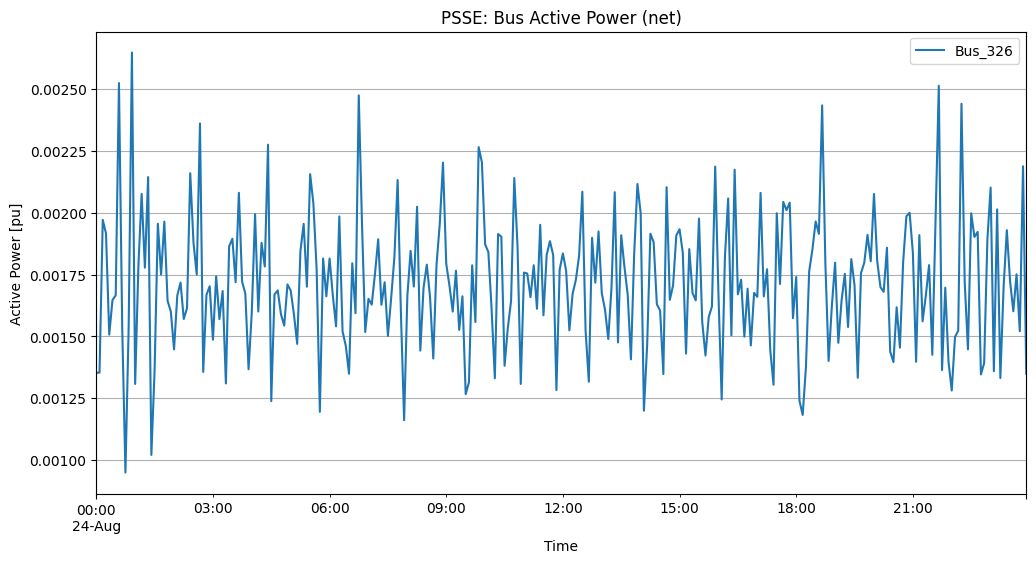

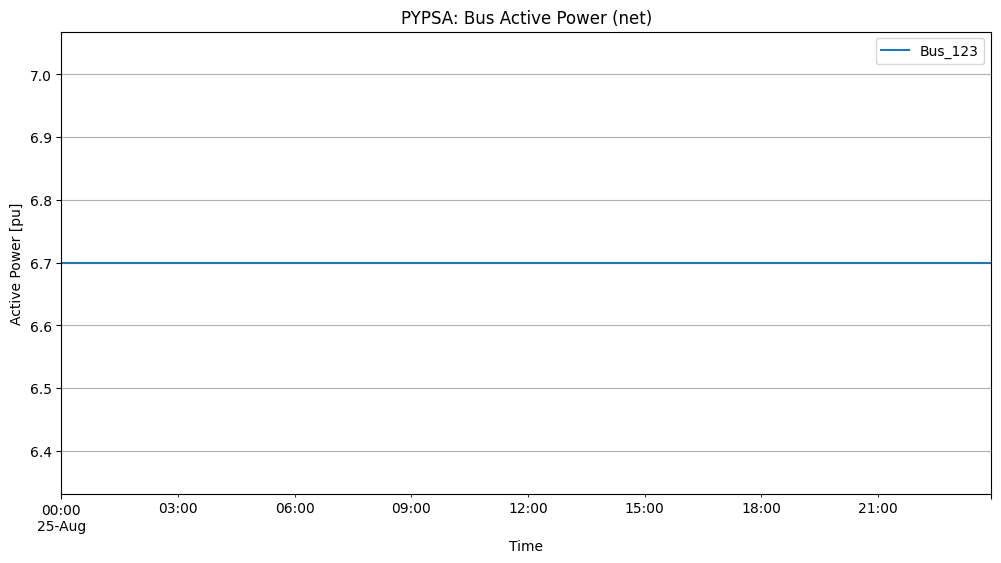

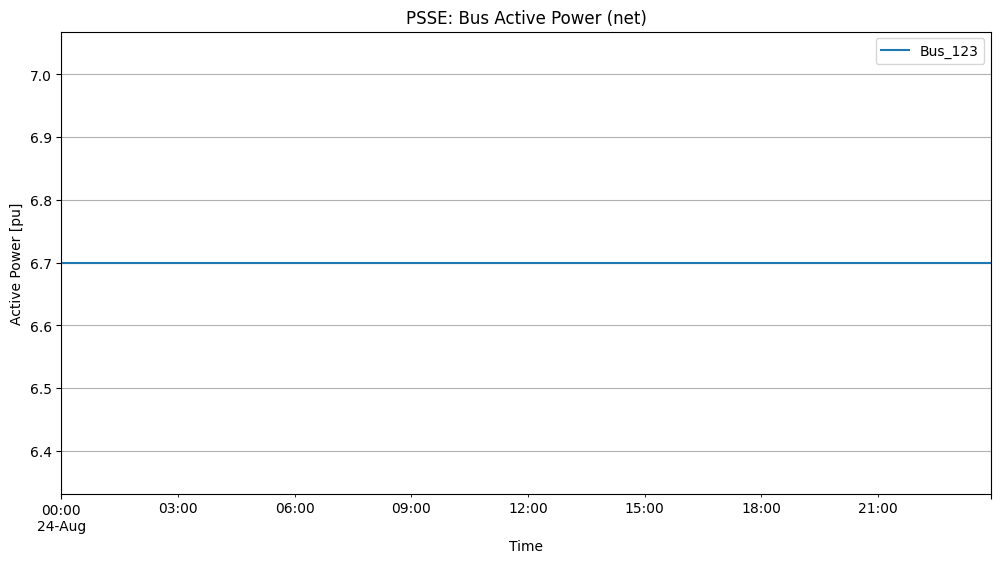

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'PSSE: Bus Active Power (net)'}, xlabel='Time', ylabel='Active Power [pu]'>)

In [10]:
example4.plot.bus("pypsa",)
example4.plot.bus("psse")
example4.plot.bus(software="pypsa", bus=['Bus_326'])
example4.plot.bus(software="psse", bus=['Bus_326'])
example4.plot.bus(software="pypsa", bus=['Bus_123'])
example4.plot.bus(software="psse", bus=['Bus_123'])

## compare

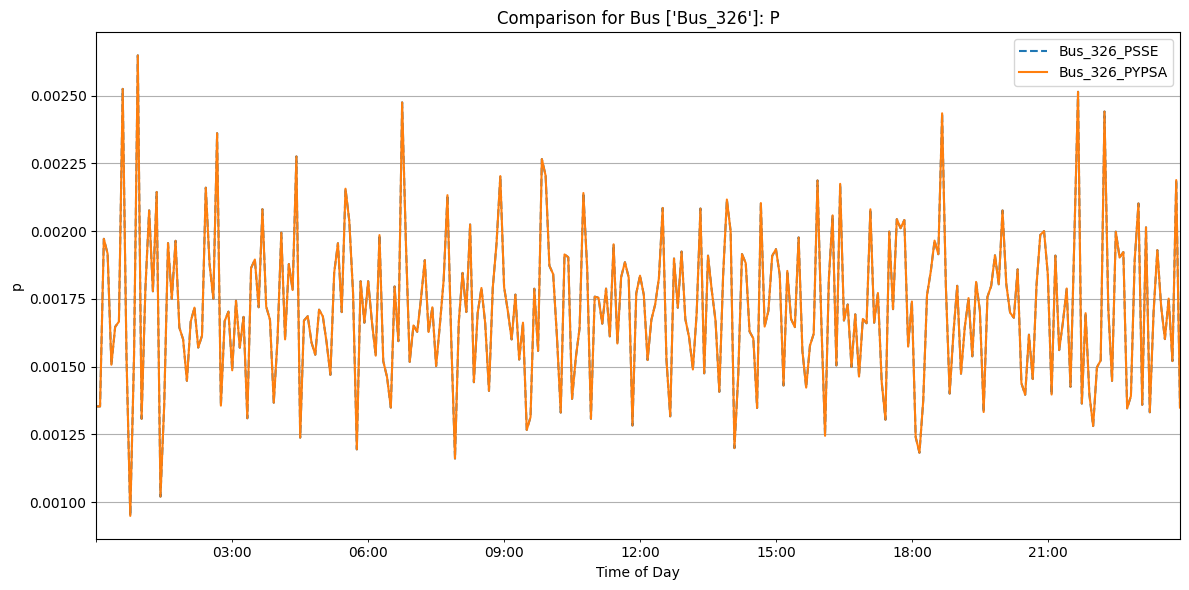

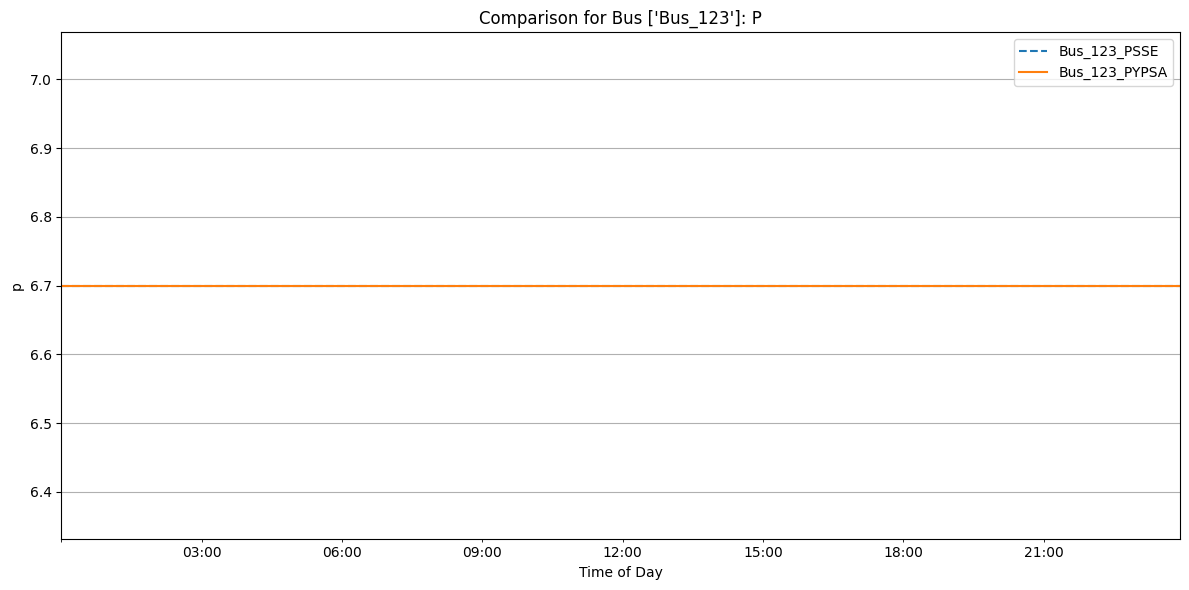

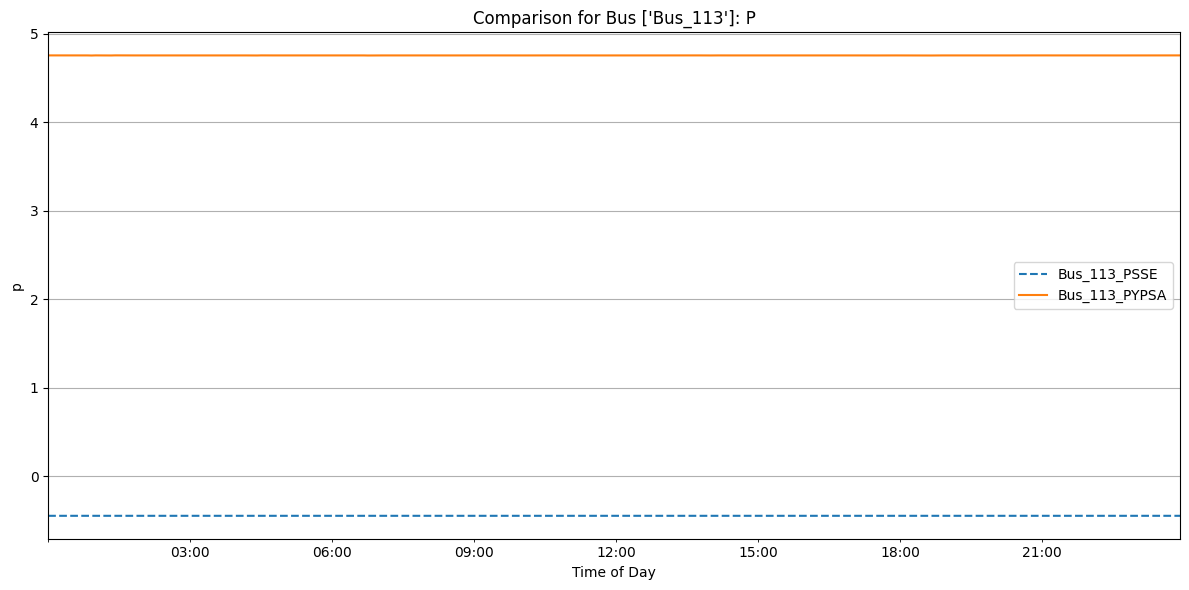

In [13]:
example4.plot.compare_modelers(grid_component='bus', name=['Bus_326'], parameter='p')
example4.plot.compare_modelers(grid_component='bus', name=['Bus_123'], parameter='p')
example4.plot.compare_modelers(grid_component='bus', name=['Bus_113'], parameter='p')